# Problem 53

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = np.genfromtxt("omega.txt",delimiter=',')

## Part a

In [2]:
print(data)

[-1.111137  -1.034847  -0.9989893 ... -0.9622435 -0.9363219 -0.9430604]


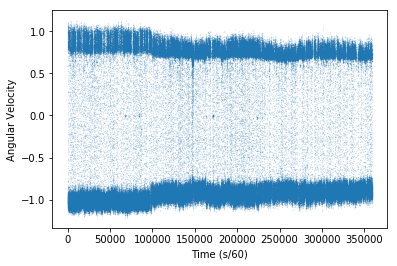

In [3]:
plt.plot(data,marker='.',linestyle='',ms=.1)
plt.ylabel("Angular Velocity")
plt.xlabel("Time (s/60)")

## Plot Distribution of Interval Lengths

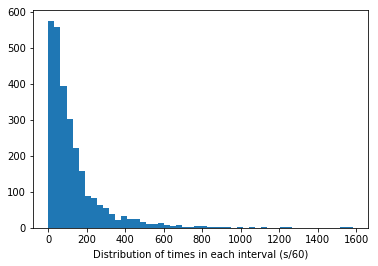

In [4]:
crossings = ((data[:-1] * data[1:]) < 0)
intervals = np.split(data,np.where(crossings==True)[0])
durations = [len(x) for x in intervals]
bin_values, bins, c = plt.hist(durations,bins=50)
plt.xlabel("Distribution of times in each interval (s/60)")

## Part b: The Distribution looks exponential

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


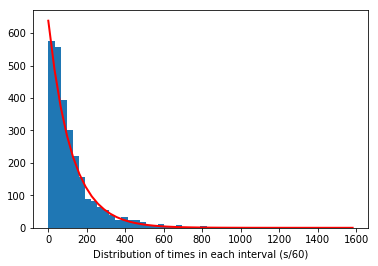

In [35]:
def exp(k,r,A):
    return A*np.exp(-r*k)
crossings = ((data[:-1] * data[1:]) < 0)
intervals = np.split(data,np.where(crossings==True)[0])
durations = [len(x) for x in intervals]
#bin_values, bins, c = plt.hist(durations,bins=50)
plt.xlabel("Distribution of times in each interval (s/60)")

bin_values, bins, c = plt.hist(durations,bins=50)
parameters, cov = curve_fit(exp, bins[:-1], (bin_values))
xval = np.linspace(0,np.amax(durations)+1)
plt.plot(xval, exp(xval,*parameters),'r-', lw=2)
plt.xlabel("Distribution of times in each interval (s/60)")
plt.show()
residuals = bin_values - exp(bins[:-1],*parameters)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((bin_values-np.mean(bin_values))**2)
r_sq = 1 - ss_res/ss_tot
#print("MSE = " + str(ss_res))
#print("R^2 = " + str(r_sq))

## Part C: The extreme $\omega$ values vary over time, but look relatively constant over 0-100000 s/60

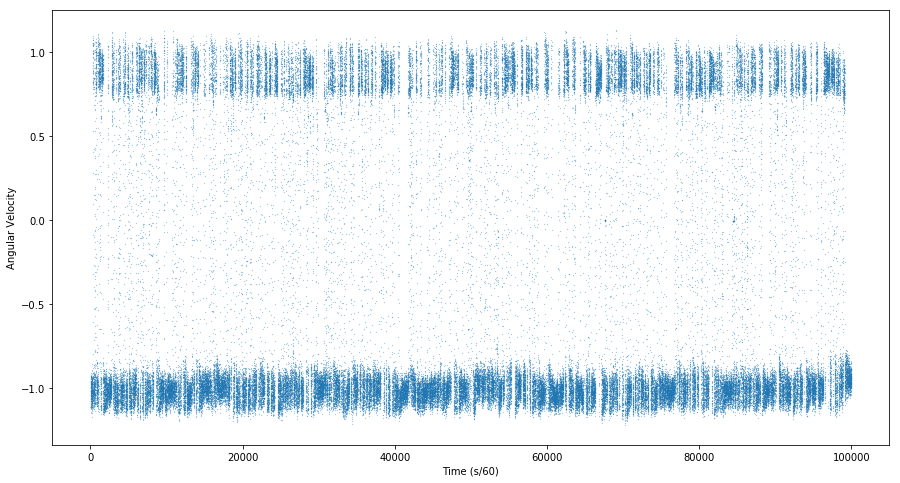

In [23]:
plt.figure(figsize=(15,8))
plt.plot((data[0:100000]),marker='.',linestyle='',ms=.3)
plt.ylabel("Angular Velocity")
plt.xlabel("Time (s/60)")
plt.show()

## Let's redo the calculation with just those datapoints.  The distribution still looks exponential

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


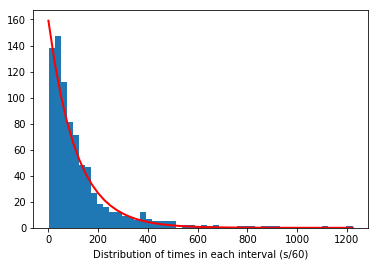

In [36]:
plt.clf()
steady_data = data[0:100000]
crossings = ((steady_data[:-1] * steady_data[1:]) < 0)
intervals = np.split(steady_data,np.where(crossings==True)[0])
durations = [len(x) for x in intervals]
#bin_values, bins, c = plt.hist(durations,bins=50)

bin_values, bins, c = plt.hist(durations,bins=50)
parameters, cov = curve_fit(exp, bins[:-1], (bin_values))
xval = np.linspace(0,np.amax(durations)+1)
plt.plot(xval, exp(xval,*parameters),'r-', lw=2)
plt.xlabel("Distribution of times in each interval (s/60)")
plt.show()
residuals = bin_values - exp(bins[:-1],*parameters)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((bin_values-np.mean(bin_values))**2)
r_sq = 1 - ss_res/ss_tot
#print("MSE = " + str(ss_res))

## Part D. The "partial switches" look like momentary "breaks" where $\omega$ drops to close to zero.  These could be modeled as instantaneous collisions that alter the cell's rotation briefly.

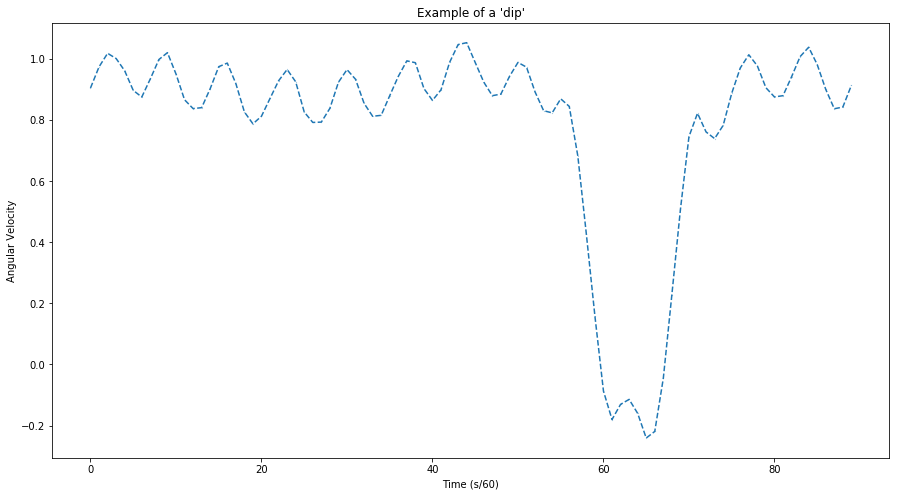

In [130]:
plt.figure(figsize=(15,8))
plt.plot((data[1200:1290]),marker='.',linestyle='--',ms=.3)
plt.ylabel("Angular Velocity")
plt.xlabel("Time (s/60)")
plt.title("Example of a 'dip'")
plt.show()

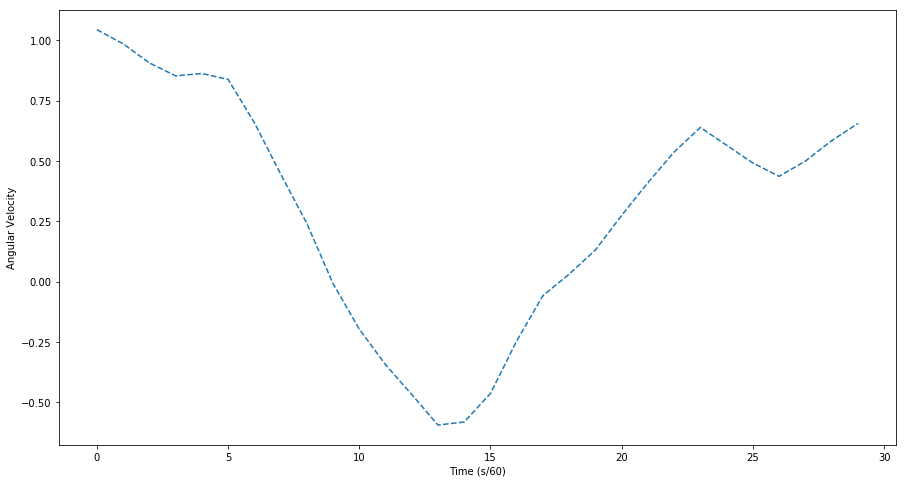

In [104]:
plt.figure(figsize=(15,8))
plt.plot((data[4925:4955]),marker='.',linestyle='--',ms=.3)
plt.ylabel("Angular Velocity")
plt.xlabel("Time (s/60)")
plt.show()

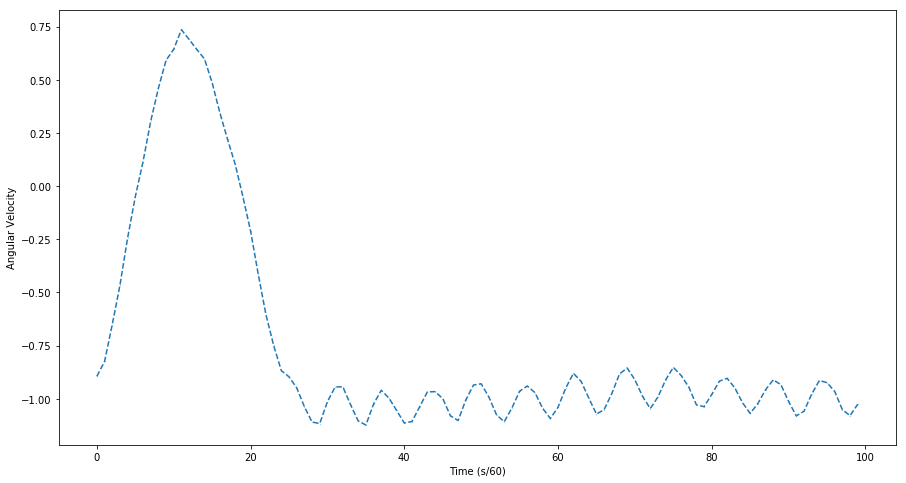

In [62]:
plt.figure(figsize=(15,8))
plt.plot((data[5020:5120]),marker='.',linestyle='--',ms=.3)
plt.ylabel("Angular Velocity")
plt.xlabel("Time (s/60)")
plt.show()